<font color='blue' size='6'>In this example given titanic dataset we will learn to predict Survived that is whether the passenger survived or not</font>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [7]:
titanic_data = pd.read_csv("Titanic.csv")
titanic_data.head(10) # printing 10 rows of data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [9]:
print('# of the passengers in original data:' + str(len(titanic_data.index)))  #891 passengers in titanic ship

# of the passengers in original data:891


<font color='blue' size='20'>Analyzing Data</font>

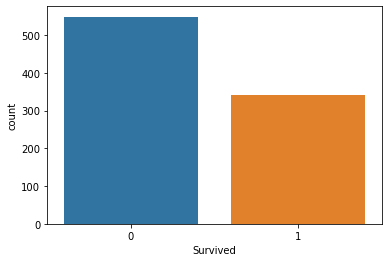

In [11]:
sns.countplot(x="Survived",data=titanic_data) 
# 0 --> passengers who did not survive
#1 --> passengers who did survive

In [12]:
# from above plot we conclude that there are very few who survived as compared to not survived

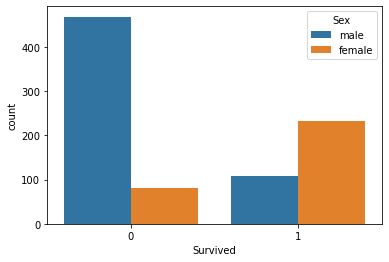

In [13]:
#to see how many males survived, how many females survievd
sns.countplot(x="Survived",hue="Sex",data=titanic_data)

In [14]:
# from above graph we see majority of males did not survive
#majority of females did survive

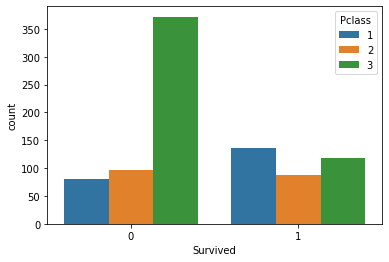

In [16]:
sns.countplot(x="Survived",hue="Pclass",data=titanic_data)

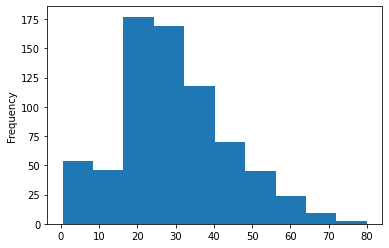

In [17]:
titanic_data["Age"].plot.hist()

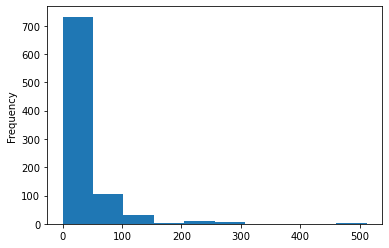

In [20]:
titanic_data["Fare"].plot.hist()


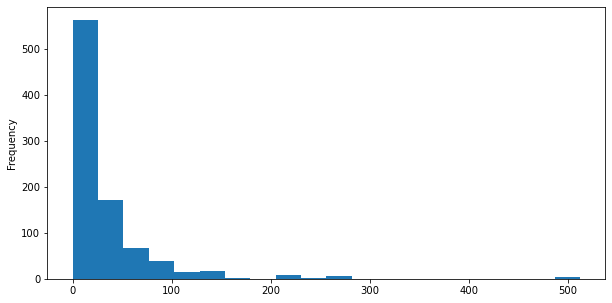

In [21]:
# to make the histogram more clear
titanic_data["Fare"].plot.hist(bins=20,figsize=(10,5))

In [22]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


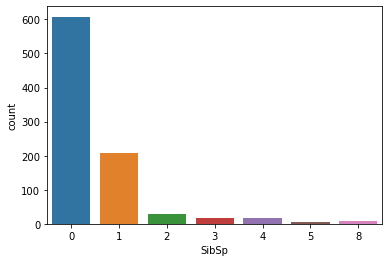

In [23]:
sns.countplot(x="SibSp",data=titanic_data)

<font color='blue' size='20'>Data Wrangling</font>

<font color='orange'>Clean the data by removing the Nan values and unnecessary columns in the dataset</font>

In [25]:
titanic_data.isnull() 
#true --> if values is null
#false --> if value is not null

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [26]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

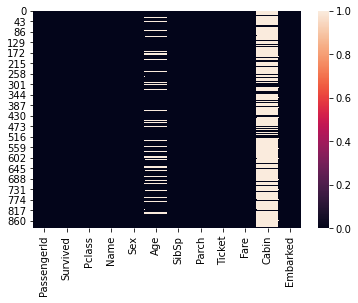

In [29]:
#plotting the heat map to see missing values of each column
sns.heatmap(titanic_data.isnull())

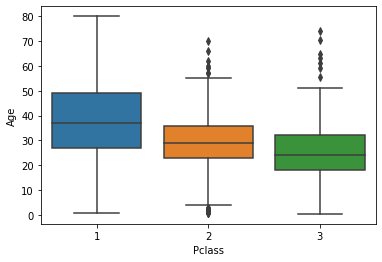

In [30]:
sns.boxplot(x="Pclass",y="Age",data=titanic_data)

<font color='blue'>as we have many missing values in cabin column
we have options to overcome the problem
1. Fill in some random values
2. Remove rows containing cabin=null
3. Remove cabin column</font>


In [32]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
titanic_data.drop("Cabin",axis = 1, inplace=True)

In [34]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [35]:
#now here we are dropping all rows with Nan values
titanic_data.dropna(inplace=True)

In [36]:
print(len(titanic_data.index))

712


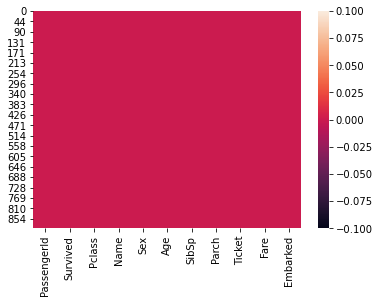

In [37]:
sns.heatmap(titanic_data.isnull())

In [38]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<font color='blue' style='bold'>now our data has no null or nan values</font>

In [39]:
titanic_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


<pre><font color='blue'>As we can see there are a lot of string values in the dataset
algo takes input as numbers only
so lets convert them into dummy variables using pandas</font></pre>


In [40]:
pd.get_dummies(titanic_data['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
885,1,0
886,0,1
887,1,0
889,0,1


<pre><font color='blue'> now we do not require 2 columns male and female
instead the information can be stored in one column itself
so we can either keep male or female column
if male=1 it is male and not a female</font></pre>

In [43]:
sex = pd.get_dummies(titanic_data['Sex'],drop_first=True)

In [44]:
sex.head(5)

,male
0,1
1,0
2,0
3,0
4,1


In [45]:
embark = pd.get_dummies(titanic_data["Embarked"])
embark.head(5)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


<pre><font color='blue'> here also any 2 columns are sufficient 
no need for 3 columns
suppose we keep C and Q
if c=0 and q=0 then we can understand it belongs to S</font></pre>

In [47]:
embark = pd.get_dummies(titanic_data["Embarked"],drop_first=True)
embark.head(5)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [48]:
#similar wil be done for PClass
Pcl = pd.get_dummies(titanic_data["Pclass"],drop_first=True)
Pcl.head(5)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [49]:
# now we will concat all the new generated columns to our data
titanic_data = pd.concat([titanic_data,sex,embark,Pcl],axis=1)

In [50]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [51]:
#now we will remove the old columns that have been converted and added
# we will also remove unwanted columns
#name, ticket number all such things are unwanted
titanic_data.drop(['Sex','Embarked','PassengerId','Name','Ticket'],axis=1,inplace=True)

In [52]:
titanic_data.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,3,22.0,1,0,7.2500,1,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0


In [53]:
titanic_data.drop(['Pclass'],axis=1,inplace=True)

In [54]:
titanic_data.head(2)

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0


<pre><font color='blue'>We will divide the data in train subset and test subset
Build the model on the train data and predict the output on test data</font></pre>

In [55]:
X = titanic_data.drop("Survived",axis=1)
y = titanic_data["Survived"]

In [58]:
#from sklearn.cross_validation import train_test_split
# do not use cross_validation it will probably not work
from sklearn.model_selection import train_test_split

In [59]:
#shift + tab for documentation
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=1)

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
logmodel = LogisticRegression()

In [62]:
logmodel.fit(X_train,y_train)

C:\Users\User\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [63]:
predictions = logmodel.predict(X_test)

In [64]:
from sklearn.metrics import classification_report

In [65]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.80      0.81      0.81       126\n           1       0.72      0.72      0.72        88\n\n    accuracy                           0.77       214\n   macro avg       0.76      0.76      0.76       214\nweighted avg       0.77      0.77      0.77       214\n'

In [66]:
# to calculate the accuracy we will first print confusion matrix
from sklearn.metrics import confusion_matrix

In [67]:
confusion_matrix(y_test,predictions)

array([[102,  24],
       [ 25,  63]], dtype=int64)

<font color='blue'> example of confusion matrix</font>
<img src='attachments/aa.png'></img>

In [68]:
from sklearn.metrics import accuracy_score

In [70]:
accuracy_score(y_test,predictions) * 100

77.10280373831776